In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
cwd = os.getcwd()

## Creating pipeline

In [3]:
BATCH_SIZE = 32

### Creating train tf.data.dataset

In [4]:
cwd = os.getcwd()
train_file_path = '/'.join(cwd.split('/')[:-2]) + '/preprocessing/data/3_10000/train_3_10000.csv'
train_df = pd.read_csv(train_file_path)

In [5]:
## converting the labels into unique integers
train_df['label'] = train_df.label.astype('category').cat.codes

In [6]:
## train_3_half.csv
train_labels = train_df.pop('label')
train_dataset = tf.data.Dataset.from_tensor_slices((train_df.values, train_labels.values))

In [7]:
## Just a quick test
for feat, targ in train_dataset.take(5):
    print('Features: {}, Target: {}'.format(feat, targ))

Features: [  1. 187. 242. ...   0.   0.   0.], Target: 2
Features: [  1. 187. 231. ...   0.   0.   0.], Target: 1
Features: [  1. 187. 242. ...   0.   0.   0.], Target: 2
Features: [  1. 187. 240. ...   0.   0.   0.], Target: 2
Features: [  1. 187. 243. ...   0.   0.   0.], Target: 2


In [8]:
train_dataset = train_dataset.shuffle(len(train_df)).batch(BATCH_SIZE)

### Creating test tf.data.dataset

In [9]:
test_file_path = '/'.join(cwd.split('/')[:-2]) + '/preprocessing/data/3_10000/test_3_10000.csv'
test_df = pd.read_csv(test_file_path)

In [10]:
## converting the labels into unique integers
test_df['label'] = test_df.label.astype('category').cat.codes

In [11]:
## test_3_half.csv
test_labels = test_df.pop('label')
test_dataset = tf.data.Dataset.from_tensor_slices((test_df.values, test_labels.values))

In [12]:
## Just a quick test
for feat, targ in test_dataset.take(5):
    print('Features: {}, Target: {}'.format(feat, targ))

Features: [  1. 187. 244. ...   0.   0.   0.], Target: 0
Features: [  1. 187. 163. ...   0.   0.   0.], Target: 0
Features: [244. 126.   1. ...   0.   0.   0.], Target: 0
Features: [  1. 187. 193. ...   0.   0.   0.], Target: 0
Features: [  1. 187. 244. ...   0.   0.   0.], Target: 0


In [13]:
test_dataset = test_dataset.shuffle(len(test_df)).batch(BATCH_SIZE)

## Create and train

In [14]:
def get_compiled_model():
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(3)
    ])

    model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
    return model

In [15]:
model = get_compiled_model()
history = model.fit(train_dataset, epochs=10)

Train for 750 steps
Epoch 1/10
750/750 [==============================] - 7s 10ms/step - loss: 2.5196 - accuracy: 0.7054
Epoch 2/10
750/750 [==============================] - 7s 10ms/step - loss: 0.5575 - accuracy: 0.8325
Epoch 3/10
750/750 [==============================] - 7s 10ms/step - loss: 0.4092 - accuracy: 0.8694
Epoch 4/10
750/750 [==============================] - 7s 10ms/step - loss: 0.4164 - accuracy: 0.8802
Epoch 5/10
750/750 [==============================] - 7s 10ms/step - loss: 0.3355 - accuracy: 0.8894
Epoch 6/10
750/750 [==============================] - 8s 10ms/step - loss: 0.2418 - accuracy: 0.9139
Epoch 7/10
750/750 [==============================] - 8s 10ms/step - loss: 0.2325 - accuracy: 0.9176
Epoch 8/10
750/750 [==============================] - 8s 11ms/step - loss: 0.2235 - accuracy: 0.9231
Epoch 9/10
750/750 [==============================] - 8s 10ms/step - loss: 0.2253 - accuracy: 0.9254
Epoch 10/10
750/750 [==============================] - 8s 10ms/step - l

## Plotting results

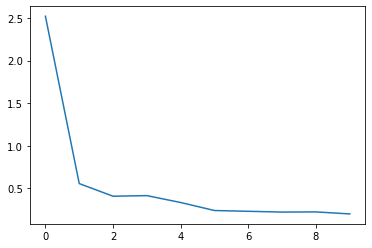

In [16]:
plt.plot(history.history['loss'])

## Evaluate the model

In [17]:
test_result = model.evaluate(test_dataset)
dict(zip(model.metrics_names, test_result))

188/188 [==============================] - 1s 5ms/step - loss: 0.2543 - accuracy: 0.9218


{'loss': 0.25425077480402714, 'accuracy': 0.92183334}